In [1]:
import pandas as pd 
import numpy as np

## Import CSV as DataFrame

In [2]:
df=pd.read_csv("Dataset/salesdata.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.shape

(14204, 12)

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [7]:
x=df[['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]


<Axes: >

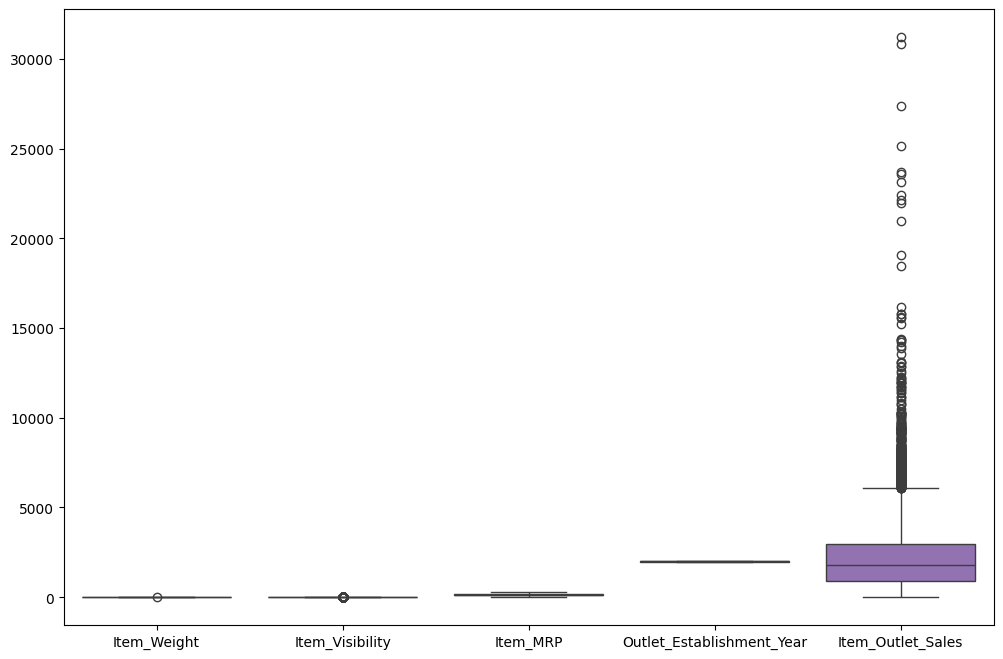

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.boxplot(x)

            

In [9]:
x1=df[['Item_Weight']]

<Axes: >

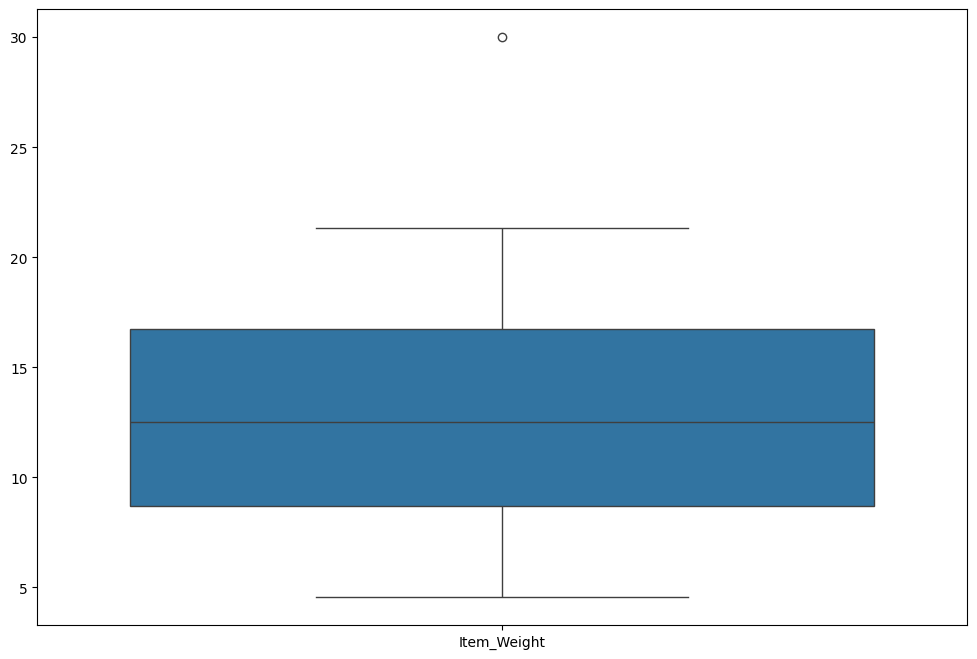

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.boxplot(x1)

            

In [11]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('median'),inplace=True)

/tmp/ipykernel_4214/225291204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('median'),inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [13]:
from scipy import stats
df=df[np.abs(stats.zscore(df['Item_Outlet_Sales']))<2]

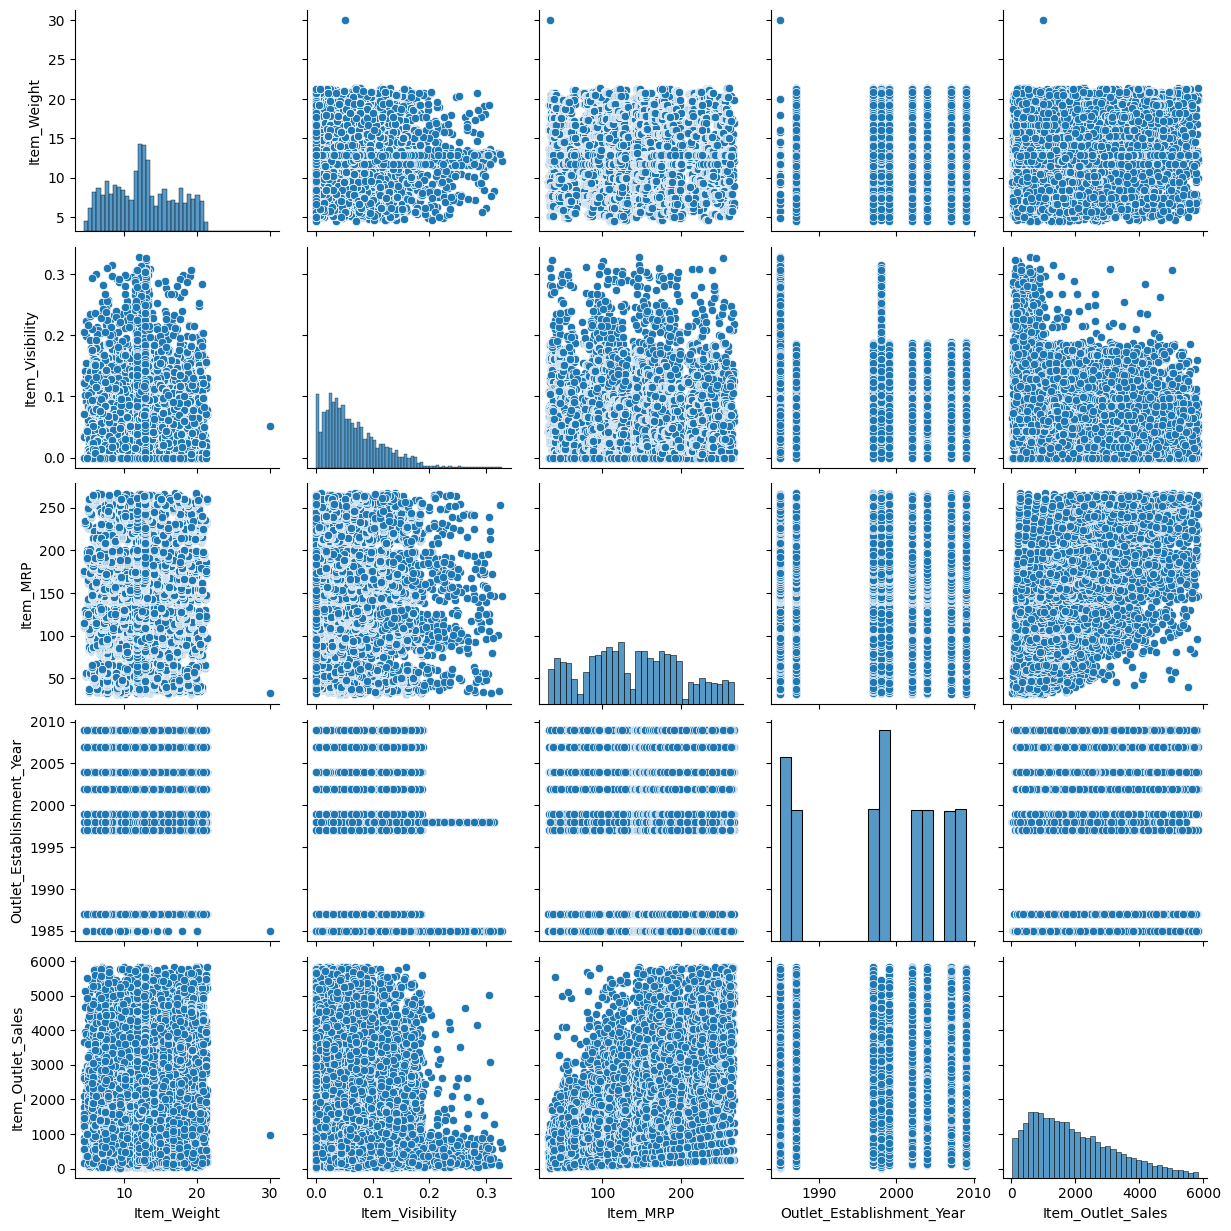

In [14]:
import seaborn as sns
sns.pairplot(df)

In [15]:
df.shape

(13710, 12)

In [16]:
df[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDD58              10
FDD56              10
FDD53              10
FDY36              10
                   ..
FDC02               5
FDY55               5
NCL42               5
FDT21               5
FDA15               3
Name: count, Length: 1559, dtype: int64

In [17]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8173
Regular             4665
LF                   512
reg                  190
low fat              170
Name: count, dtype: int64

In [18]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}},inplace=True)

In [19]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8855
Regular             4855
Name: count, dtype: int64

In [20]:
df.replace({'Item_Fat_Content':{'Low Fat':0,'Regular':1}},inplace=True)

/tmp/ipykernel_4214/1857951162.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Item_Fat_Content':{'Low Fat':0,'Regular':1}},inplace=True)


In [21]:
df[['Item_Type']].value_counts()

Item_Type            
Fruits and Vegetables    1939
Snack Foods              1917
Household                1491
Frozen Foods             1372
Dairy                    1091
Baking Goods             1062
Canned                   1048
Health and Hygiene        828
Meat                      710
Soft Drinks               703
Breads                    406
Hard Drinks               347
Others                    273
Starchy Foods             261
Breakfast                 177
Seafood                    85
Name: count, dtype: int64

In [22]:
df.replace({'Item_Type':{'Fruits and Vegetables':0,'Snack Foods':0,'Household':1,
            'Frozen Foods':0,'Dairy':0,'Baking Goods':0,
            'Canned':0,'Health and Hygiene':1,'Meat':0,'Soft Drinks':0,
            'Breads':0,'Hard Drinks':0,'Others':2,'Starchy Foods':0,'Breakfast':0,'Seafood':0}},inplace=True)

/tmp/ipykernel_4214/2846021281.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Item_Type':{'Fruits and Vegetables':0,'Snack Foods':0,'Household':1,


In [23]:
df[['Item_Type']].value_counts()

Item_Type
0            11118
1             2319
2              273
Name: count, dtype: int64

In [24]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT018               1529
OUT046               1529
OUT013               1525
OUT045               1523
OUT049               1520
OUT035               1517
OUT017               1511
OUT027               1284
OUT010                925
OUT019                847
Name: count, dtype: int64

In [25]:
df.replace({'Outlet_Identifier':{'OUT027':0,'OUT013':1,'OUT049':2,'OUT046':3,'OUT035':4,'OUT045':5,'OUT018':6,
                                 'OUT017':7,'OUT010':8,'OUT019':9,}},inplace=True)

/tmp/ipykernel_4214/3760403830.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Outlet_Identifier':{'OUT027':0,'OUT013':1,'OUT049':2,'OUT046':3,'OUT035':4,'OUT045':5,'OUT018':6,


In [26]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
3                    1529
6                    1529
1                    1525
5                    1523
2                    1520
4                    1517
7                    1511
0                    1284
8                     925
9                     847
Name: count, dtype: int64

In [27]:
df[['Outlet_Size']].value_counts()

Outlet_Size
Medium         6768
Small          5417
High           1525
Name: count, dtype: int64

In [28]:
df.replace({'Outlet_Size':{'Small':0,'Medium':1,'High':1}},inplace=True)

/tmp/ipykernel_4214/4163788090.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Outlet_Size':{'Small':0,'Medium':1,'High':1}},inplace=True)


In [29]:
df[['Outlet_Size']].value_counts()

Outlet_Size
1              8293
0              5417
Name: count, dtype: int64

In [30]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
Tier 3                  5263
Tier 2                  4551
Tier 1                  3896
Name: count, dtype: int64

In [31]:
df.replace({'Outlet_Location_Type':{'Tier 1':0,'Tier 2':1,'Tier 3':2}},inplace=True)

/tmp/ipykernel_4214/4281510688.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Outlet_Location_Type':{'Tier 1':0,'Tier 2':1,'Tier 3':2}},inplace=True)


In [32]:
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2                       5263
1                       4551
0                       3896
Name: count, dtype: int64

In [33]:
df[['Outlet_Type']].value_counts()

Outlet_Type      
Supermarket Type1    9125
Grocery Store        1772
Supermarket Type2    1529
Supermarket Type3    1284
Name: count, dtype: int64

In [36]:
df.replace({'Outlet_Type':{'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}},inplace=True)

/tmp/ipykernel_4214/583778571.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Outlet_Type':{'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}},inplace=True)


In [37]:
df[['Outlet_Type']].value_counts()

Outlet_Type
1              9125
0              1772
2              1529
3              1284
Name: count, dtype: int64

In [38]:
df.describe().corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,0.999999,0.999999,0.999999,0.999907,0.999999,0.986922,0.999999,0.999999,0.999999,0.922230
Item_Fat_Content,0.999999,1.000000,1.000000,1.000000,0.999885,1.000000,0.986804,1.000000,1.000000,1.000000,0.921632
Item_Visibility,0.999999,1.000000,1.000000,1.000000,0.999884,1.000000,0.986805,1.000000,1.000000,1.000000,0.921613
Item_Type,0.999999,1.000000,1.000000,1.000000,0.999885,1.000000,0.986804,1.000000,1.000000,1.000000,0.921652
Item_MRP,0.999907,0.999885,0.999884,0.999885,1.000000,0.999892,0.987665,0.999885,0.999886,0.999886,0.927151
Outlet_Identifier,0.999999,1.000000,1.000000,1.000000,0.999892,1.000000,0.986823,1.000000,1.000000,1.000000,0.921815
Outlet_Establishment_Year,0.986922,0.986804,0.986805,0.986804,0.987665,0.986823,1.000000,0.986806,0.986807,0.986810,0.921226
Outlet_Size,0.999999,1.000000,1.000000,1.000000,0.999885,1.000000,0.986806,1.000000,1.000000,1.000000,0.921629
Outlet_Location_Type,0.999999,1.000000,1.000000,1.000000,0.999886,1.000000,0.986807,1.000000,1.000000,1.000000,0.921657
Outlet_Type,0.999999,1.000000,1.000000,1.000000,0.999886,1.000000,0.986810,1.000000,1.000000,1.000000,0.921669


In [39]:
y=df['Item_Outlet_Sales']

In [41]:
x=df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

## Get Trian Test Split

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [44]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10282, 10), (3428, 10), (10282,), (3428,))

In [50]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [67]:
from sklearn.metrics import mean_absolute_error,r2_score

In [68]:
r2_score(y_test,y_pred)

0.49575405549254603

In [69]:
mean_absolute_error(y_test,y_pred)

687.6221971938421

In [51]:
from sklearn import metrics

y_pred = clf.predict(x_test)

print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("R-Squared (R²):", metrics.r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", metrics.mean_absolute_percentage_error(y_test, y_pred))

Mean Squared Error (MSE): 887386.1898280025
Mean Absolute Error (MAE): 686.789989790411
R-Squared (R²): 0.5032812035317518
Mean Absolute Percentage Error (MAPE): 0.6990460000510067


In [60]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf_reg, n_features_to_select=6)

In [61]:
rf=rfe.fit(x_train, y_train)

In [62]:
col=rfe.support_col=x_train.columns[rfe.support_]
col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier'], dtype='object')

In [63]:
x1=df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier']]

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=42)

In [65]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [66]:
from sklearn import metrics

y_pred = clf.predict(x_test)

print("Mean Squared Error (MSE):", metrics.mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", metrics.mean_absolute_error(y_test, y_pred))
print("R-Squared (R²):", metrics.r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", metrics.mean_absolute_percentage_error(y_test, y_pred))

Mean Squared Error (MSE): 906057.9245575235
Mean Absolute Error (MAE): 687.6221971938421
R-Squared (R²): 0.49575405549254603
Mean Absolute Percentage Error (MAPE): 0.6765356212287648
